#Analisis Data Netflix Movies and TV Shows

#Load Dataset

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [52]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [53]:
df = pd.read_csv("netflix_titles.csv")

#Data Collection

In [54]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [55]:
print("Ukuran dataset (baris, kolom):", df.shape)

Ukuran dataset (baris, kolom): (8807, 12)


In [56]:
print("Informasi dataset:")
print(df.info())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [57]:
print("Jumlah data unik tiap kolom:")
print(df.nunique())

Jumlah data unik tiap kolom:
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


#Data Cleaning & Preprocessing

##Penanganan Missing Value

In [58]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Missing rows in date_added, rating, and duration columns will be removed because they have a small number.

Missing rows in the director, cast, and country columns will be filled with ‘Unknown’ because it is important data.

In [59]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [60]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

<ipython-input-60-c16dc916dc38>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-60-c16dc916dc38>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [73]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [62]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,88
release_year,0
rating,0
duration,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


#Exploratory Data Analysis (EDA)

In [64]:
total_konten = df.shape[0]
print(f"Total Konten: {total_konten}")

Total Konten: 8790


In [65]:
jumlah_movie = df[df['type'] == 'Movie'].shape[0]
jumlah_tvshow = df[df['type'] == 'TV Show'].shape[0]

print(f"Jumlah Movie: {jumlah_movie}")
print(f"Jumlah TV Show: {jumlah_tvshow}")

Jumlah Movie: 6126
Jumlah TV Show: 2664


In [66]:
jumlah_negara = df['country'].dropna().str.split(', ').explode().nunique()

print(f"Jumlah Negara: {jumlah_negara}")

Jumlah Negara: 128


In [67]:
tahun_min = df['release_year'].min()
tahun_max = df['release_year'].max()

print(f"Rentang Tahun Rilis: {tahun_min} - {tahun_max}")

Rentang Tahun Rilis: 1925 - 2021


In [68]:
jumlah_sutradara = df['director'].dropna().nunique()
jumlah_pemeran = df['cast'].dropna().str.split(', ').explode().nunique()

print(f"Jumlah Sutradara: {jumlah_sutradara}")
print(f"Jumlah Pemeran: {jumlah_pemeran}")

Jumlah Sutradara: 4527
Jumlah Pemeran: 36393


In [69]:
genre_terpopuler = df['listed_in'].str.split(', ').explode().value_counts().head(3)

print("Genre Terpopuler:")
print(genre_terpopuler)

Genre Terpopuler:
listed_in
International Movies    2752
Dramas                  2426
Comedies                1674
Name: count, dtype: int64


## Distribusi Data

<ipython-input-70-41e42ece8fb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


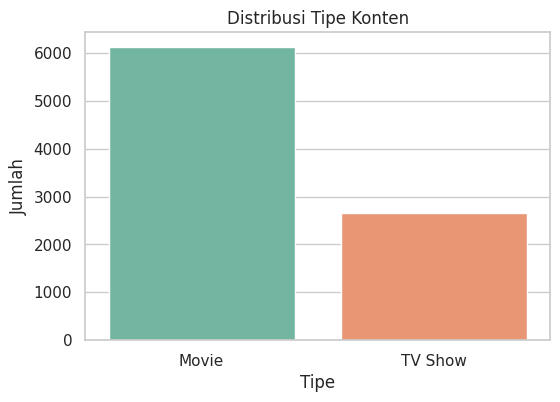

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribusi Tipe Konten")
plt.xlabel("Tipe")
plt.ylabel("Jumlah")
plt.show()

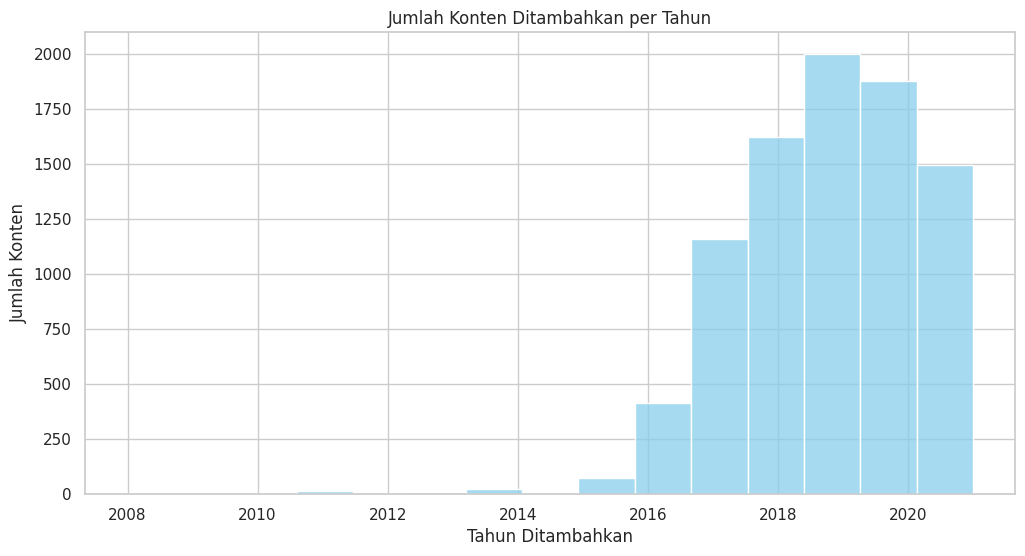

In [74]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='year_added', bins=15, kde=False, color='skyblue')
plt.title("Jumlah Konten Ditambahkan per Tahun")
plt.xlabel("Tahun Ditambahkan")
plt.ylabel("Jumlah Konten")
plt.show()

<ipython-input-75-8b2ba565e3f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


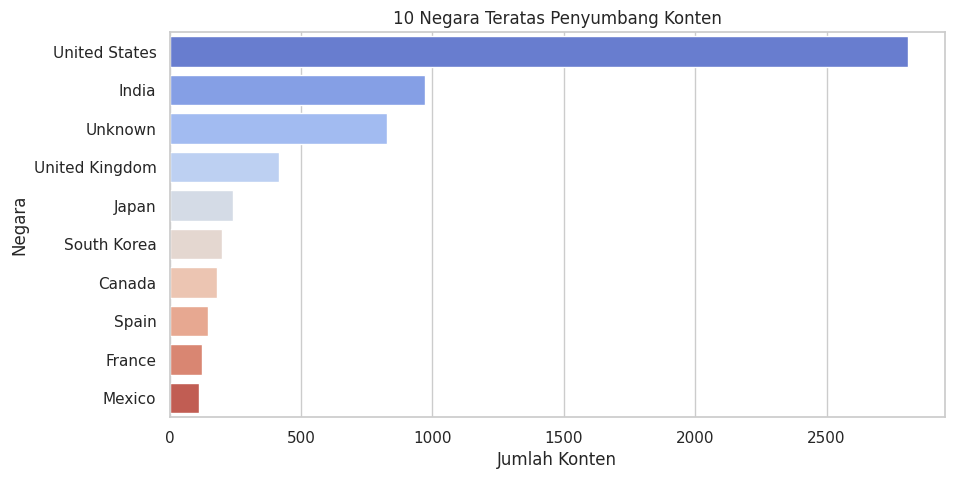

In [75]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("10 Negara Teratas Penyumbang Konten")
plt.xlabel("Jumlah Konten")
plt.ylabel("Negara")
plt.show()

<ipython-input-76-6bea3f9bd6be>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=genres, palette='magma')


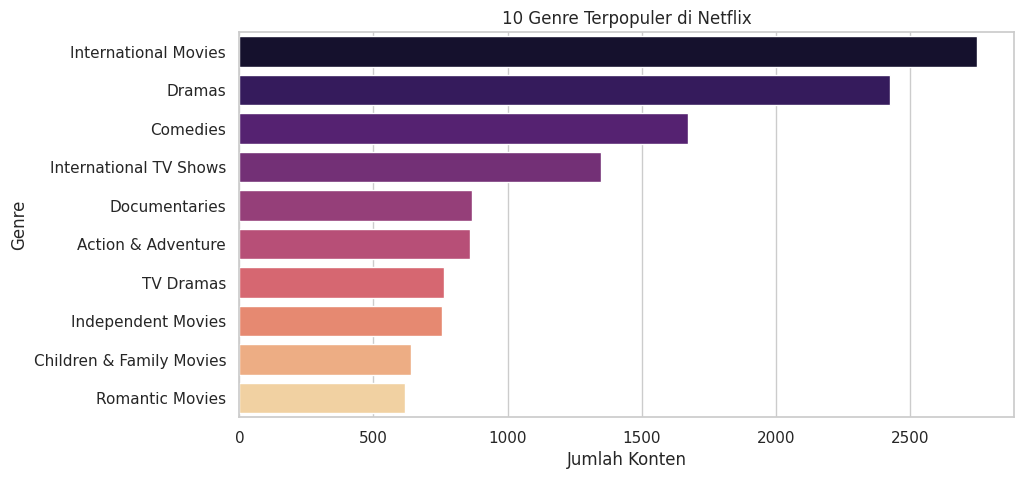

In [76]:
from collections import Counter

genre_list = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genre_list for genre in sublist]

genre_count = Counter(all_genres)
top_genres = genre_count.most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=counts, y=genres, palette='magma')
plt.title("10 Genre Terpopuler di Netflix")
plt.xlabel("Jumlah Konten")
plt.ylabel("Genre")
plt.show()

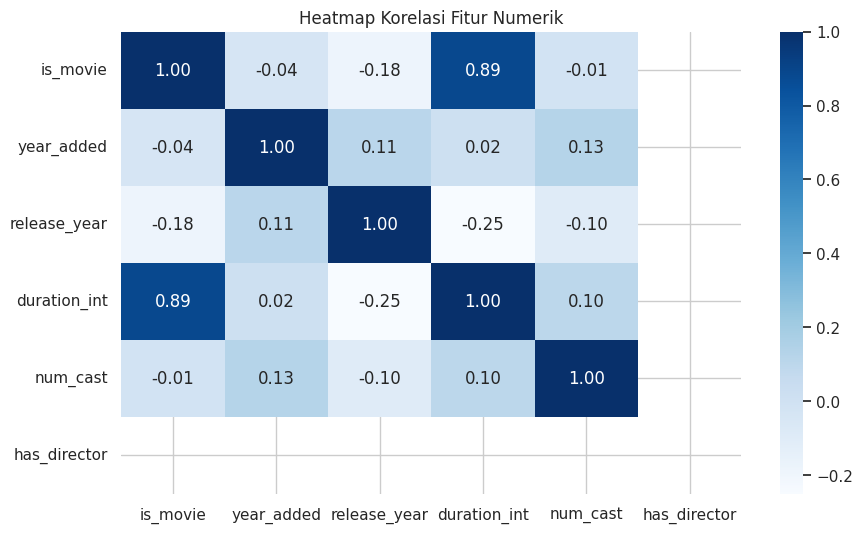

In [78]:
df_corr = df.copy()

df_corr['is_movie'] = df_corr['type'].apply(lambda x: 1 if x == 'Movie' else 0) # ->mengubah tipe

df_corr['date_added'] = pd.to_datetime(df_corr['date_added'])
df_corr['year_added'] = df_corr['date_added'].dt.year

def extract_duration(val):
    try:
        return int(val.split()[0])
    except:
        return None

df_corr['duration_int'] = df_corr['duration'].apply(extract_duration)
df_corr['num_cast'] = df_corr['cast'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
df_corr['has_director'] = df_corr['director'].notnull().astype(int)

num_cols = ['is_movie', 'year_added', 'release_year', 'duration_int', 'num_cast', 'has_director']

corr_matrix = df_corr[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

Corelasi disini sebetulnya tidak terlalu dibutuhkan karena masih kurang matangnya dataset. Namun sejauh ini yang memiliki hubungan paling kuat adalah antara Tipe Konten dan Durasi Film